In [14]:
import numpy as np
import time
import torch
import torchvision
from torch import nn,optim
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def get_data_ch7():
    data = np.genfromtxt(
        r'F:\study\ml\DataSet\airfoil_self_noise\airfoil_self_noise.dat',
        delimiter='\t')
    data = (data - data.mean(axis=0)) / data.std(axis=0)
    return torch.tensor(data[:1500, :-1], dtype=torch.float32),\
    torch.tensor(data[:1500,-1],dtype=torch.float32)

In [16]:
def init_momentum_states():
    v_w=torch.zeros((features.shape[1],1),dtype=torch.float32)
    v_b=torch.zeros(1,dtype=torch.float32)
    return (v_w,v_b)

def sgd_momentum(params,states,hyperparams):
    for p,v in zip(params,states):
        v.data=hyperparams['momentum'] * v.data+hyperparams['lr']* p.grad.data
        p.data -=v.data

In [26]:
init_momentum_states()

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]]), tensor([0.]))

In [17]:
def sgd(params,states,hyperparams,batch_size):
    for p in params:
        print('p.grad : ',p.grad.data)
        p.data -= hyperparams['lr'] * p.grad.data/batch_size
def linreg(x,w,b):
    return torch.mm(x,w)+b       
def squared_loss(y_hat,y):
    return ((y_hat - y.view(y_hat.size()) )**2) /2

In [27]:
def train_ch7(optimizer_fn,
              states,
              hyperparams,
              features,
              labels,
              batch_size=10,
              num_epochs=2):
    net, loss = linreg, squared_loss
#     net, loss = linreg, nn.MSELoss()
    w = torch.nn.Parameter(torch.tensor(np.random.normal(
        0, 0.01, size=(features.shape[1], 1)),dtype=torch.float32),
                           requires_grad=True)
    b = torch.nn.Parameter(torch.zeros(1, dtype=torch.float32),
                           requires_grad=True)

    def eval_loss():
        return loss(net(features, w, b), labels).mean().item()/2
    
    def wx_grad(x,y,w,b,batch_size):
        return torch.mm(x.transpose(1,0),(torch.mm(x,w)+b-y.view(batch_size,1)) )*2 /1500/2

    ls = [eval_loss()]
    data_iter = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(
        features, labels),batch_size,shuffle=True)
    
#     optimizer=optimizer_fn(net.parameters(),**optimizer_hyperparams)
    for _ in range(num_epochs):
        start = time.time()
        for batch_i, (X, y) in enumerate(data_iter):
#             print('--------------------------------------')
#             print('wx_grad :',wx_grad(X,y,w,b,batch_size))
#             print('--------------------------------------')
            l = loss(net(X, w, b), y).mean()
#             l.backward()
#             optimizer_fn([w, b], hyperparams)
#             optimizer.step()
            print('l : ',l)
            print('eval l :',eval_loss())
            print('w grad type : ',type(w.grad))
            if w.grad is not None:
                print('---------grad zero--------------')
                w.grad.data.zero_()
                b.grad.data.zero_()
            l.backward()
        
            optimizer_fn([w, b], states, hyperparams)#,batch_size)
            if (batch_i + 1) * batch_size % 100 == 0:
                ls.append(eval_loss())
    print('loss : %f ,%f sec per epoch' % (ls[-1], time.time() - start))
    plt.plot(np.linspace(0,num_epochs,len(ls)),ls)
    plt.xlabel('epoch')
    plt.ylabel('loss')

l :  tensor(0.2675, grad_fn=<MeanBackward1>)
eval l : 0.2439945936203003
w grad type :  <class 'NoneType'>
l :  tensor(0.5333, grad_fn=<MeanBackward1>)
eval l : 0.24170450866222382
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.4883, grad_fn=<MeanBackward1>)
eval l : 0.2356882393360138
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.7755, grad_fn=<MeanBackward1>)
eval l : 0.22903916239738464
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.5419, grad_fn=<MeanBackward1>)
eval l : 0.2208673506975174
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.2343, grad_fn=<MeanBackward1>)
eval l : 0.21558552980422974
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.5237, grad_fn=<MeanBackward1>)
eval l : 0.21154600381851196
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.2810, grad_

l :  tensor(0.5153, grad_fn=<MeanBackward1>)
eval l : 0.12335813045501709
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.1266, grad_fn=<MeanBackward1>)
eval l : 0.12292959541082382
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.2298, grad_fn=<MeanBackward1>)
eval l : 0.12263765186071396
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.1815, grad_fn=<MeanBackward1>)
eval l : 0.12255556136369705
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.3283, grad_fn=<MeanBackward1>)
eval l : 0.12248042970895767
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.6188, grad_fn=<MeanBackward1>)
eval l : 0.12273465842008591
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.1782, grad_fn=<MeanBackward1>)
eval l : 0.12317297607660294
w grad type :  <class 'torch.Tensor'>
---------grad zero

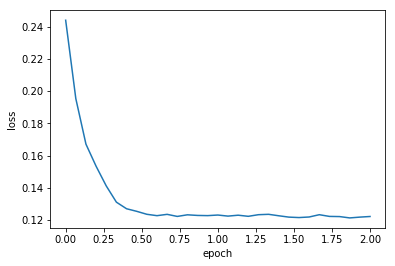

In [28]:
features,labels=get_data_ch7()
train_ch7(sgd_momentum, init_momentum_states(),{'lr': 0.02, 
                                                'momentum': 0.5}, features, labels)

l :  tensor(0.7776, grad_fn=<MeanBackward1>)
eval l : 0.24841126799583435
w grad type :  <class 'NoneType'>
l :  tensor(0.3457, grad_fn=<MeanBackward1>)
eval l : 0.24566300213336945
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.6285, grad_fn=<MeanBackward1>)
eval l : 0.2419361174106598
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.3893, grad_fn=<MeanBackward1>)
eval l : 0.23112021386623383
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.4707, grad_fn=<MeanBackward1>)
eval l : 0.21913820505142212
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.2232, grad_fn=<MeanBackward1>)
eval l : 0.20751160383224487
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.8014, grad_fn=<MeanBackward1>)
eval l : 0.1971772313117981
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.4431, grad

l :  tensor(0.2260, grad_fn=<MeanBackward1>)
eval l : 0.1283271610736847
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.2675, grad_fn=<MeanBackward1>)
eval l : 0.12688669562339783
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.2771, grad_fn=<MeanBackward1>)
eval l : 0.12619531154632568
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.2355, grad_fn=<MeanBackward1>)
eval l : 0.1262083798646927
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.1766, grad_fn=<MeanBackward1>)
eval l : 0.12683148682117462
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.2631, grad_fn=<MeanBackward1>)
eval l : 0.12643972039222717
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.1267, grad_fn=<MeanBackward1>)
eval l : 0.12603989243507385
w grad type :  <class 'torch.Tensor'>
---------grad zero--

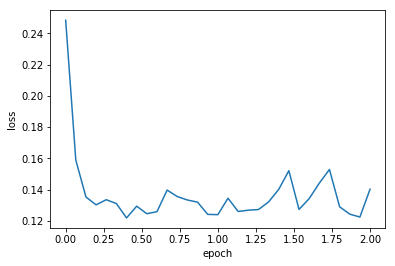

In [29]:
features,labels=get_data_ch7()
train_ch7(sgd_momentum, init_momentum_states(),{'lr': 0.02, 'momentum': 0.9}, features, labels)

l :  tensor(0.5088, grad_fn=<MeanBackward1>)
eval l : 0.24926462769508362
w grad type :  <class 'NoneType'>
l :  tensor(0.5548, grad_fn=<MeanBackward1>)
eval l : 0.24843601882457733
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.3140, grad_fn=<MeanBackward1>)
eval l : 0.24675515294075012
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.3334, grad_fn=<MeanBackward1>)
eval l : 0.24482859671115875
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.2876, grad_fn=<MeanBackward1>)
eval l : 0.24289479851722717
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.5161, grad_fn=<MeanBackward1>)
eval l : 0.2406916469335556
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.5812, grad_fn=<MeanBackward1>)
eval l : 0.2377154529094696
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.3373, grad

eval l : 0.12168077379465103
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.2911, grad_fn=<MeanBackward1>)
eval l : 0.12171648442745209
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.2232, grad_fn=<MeanBackward1>)
eval l : 0.12178473174571991
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.5065, grad_fn=<MeanBackward1>)
eval l : 0.12184663861989975
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.1096, grad_fn=<MeanBackward1>)
eval l : 0.12188579142093658
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.1190, grad_fn=<MeanBackward1>)
eval l : 0.12195854634046555
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.3181, grad_fn=<MeanBackward1>)
eval l : 0.12203305214643478
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
l :  tensor(0.2209, grad_fn=<M

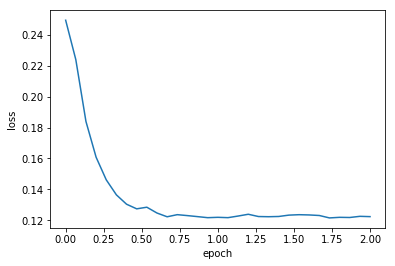

In [30]:
features,labels=get_data_ch7()
train_ch7(sgd_momentum, init_momentum_states(),{'lr': 0.004, 'momentum': 0.9}, features, labels)